In [2]:
import math
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

## Preliminary Analysis

In [3]:
df = pd.read_csv('cars_india.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
df.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [5]:
df.shape

(8128, 13)

In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### Figure No. 1

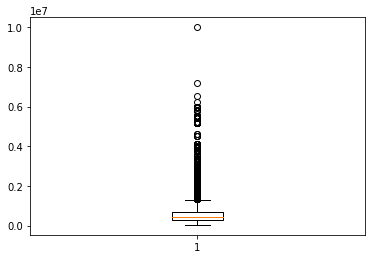

In [7]:
plt.boxplot(df.selling_price)
plt.show()

## Extractions

In [12]:
df3 = df.copy() # make a deep copy to keep original intact

# clean up column by removing leading or trailing spaces
df3['name2'] = df3['name'].str.strip()

In [13]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift VXI BSIII


In [14]:
# spliting the name column into make and name
new = df3.name2.str.split(' ', n = 1 ,expand = True)

df3['theMake'] = new[0]
df3['theName'] = new[1]

In [15]:
new.head()

,0,1
0,Maruti,Swift Dzire VDI
1,Skoda,Rapid 1.5 TDI Ambition
2,Honda,City 2017-2020 EXi
3,Hyundai,i20 Sportz Diesel
4,Maruti,Swift VXI BSIII


In [16]:
df3.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name2,theMake,theName
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII


In [17]:
df4 = df3.copy() # make a deep copy to keep original intact

# clean up column by removing leading or trailing spaces
df4['mileage2'] = df4['mileage'].str.strip()

In [19]:
# removing "kmpl" from mileage column
df4_split = df4['mileage2'].str.split(' ',1)
df4['mileage2']=df4_split.str.get(0)

In [20]:
df4.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name2,theMake,theName,mileage2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI,23.4
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi,17.7
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel,23.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII,16.1


In [21]:
df5 = df4.copy() # make a deep copy to keep original intact

# clean up column by removing leading or trailing spaces
df5['engine2'] = df5['engine'].str.strip()

In [22]:
# removing "CC" from engine column
df5_split = df5['engine2'].str.split(' ',1)
df5['engine2']=df5_split.str.get(0)

In [23]:
df5.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name2,theMake,theName,mileage2,engine2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI,23.4,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition,21.14,1498
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi,17.7,1497
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel,23.0,1396
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII,16.1,1298


In [24]:
df6 = df5.copy() # make a deep copy to keep original intact

# clean up column by removing leading or trailing spaces
df6['horsePower'] = df6['max_power'].str.strip()

In [26]:
# removing "bhp" in horsePower column
df6_split = df6['horsePower'].str.split(' ',1)
df6['horsePower']=df6_split.str.get(0)

In [27]:
df6.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,name2,theMake,theName,mileage2,engine2,horsePower
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI,23.4,1248,74
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition,21.14,1498,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi,17.7,1497,78
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel,23.0,1396,90
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII,16.1,1298,88.2


## Conversions

In [28]:
# Convert price to dollars
df6['dollarsPrice'] = df6['selling_price']/74.680132

In [30]:
# Convert km to miles 
df6['milesDriven'] = df6['km_driven']*0.6214

In [32]:
df6['mileage2'] = df6['mileage2'].astype(float)

In [33]:
df6['mpg'] = df6['mileage2'] * 2.353

In [34]:
df6.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,seats,name2,theMake,theName,mileage2,engine2,horsePower,dollarsPrice,milesDriven,mpg
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,5.0,Maruti Swift Dzire VDI,Maruti,Swift Dzire VDI,23.40,1248,74,6025.699044,90413.7,55.06020
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,5.0,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid 1.5 TDI Ambition,21.14,1498,103.52,4954.463658,74568.0,49.74242
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,5.0,Honda City 2017-2020 EXi,Honda,City 2017-2020 EXi,17.70,1497,78,2115.689887,86996.0,41.64810
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,5.0,Hyundai i20 Sportz Diesel,Hyundai,i20 Sportz Diesel,23.00,1396,90,3012.849522,78917.8,54.11900
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,5.0,Maruti Swift VXI BSIII,Maruti,Swift VXI BSIII,16.10,1298,88.2,1740.757502,74568.0,37.88330


## Create Binaries

In [35]:
# Start by setting up the dependent variable (y)

y1 = df6.copy() 

# Create binary variable for transmission 
# transmittion2 = 0 if transmission is automatic
# transmission2 = 1 if transmission is Manual 
df6["transmission2"] = 0 # sets entire column to 0
df6.loc[df6['transmission'] == 'Manual', 'transmission2'] = 1 # overwrites the value is automatic

x1 = df6[['year','fuel','seller_type','owner','engine','torque','seats','theMake','theName','mileage2','engine2','horsePower']]

In [37]:
y2 = df6.copy() 

# Create binary variable for owner 
# transmittion2 = 0 if owner is 0
# transmission2 = 1 if owner is the first ... and so on
df6["owner2"] = 0 # sets entire column to 0
df6.loc[df6['owner'] == 'First Owner', 'owner2'] = 1 # overwrites if its the first owner
df6.loc[df6['owner'] == 'Second Owner', 'owner2'] = 2 # overwrites if its the second owner
df6.loc[df6['owner'] == 'Third Owner', 'owner2'] = 3 # overwrites if its the third owner
df6.loc[df6['owner'] == 'Fourth & Above Owner', 'owner2'] = 4 # overwrites if its the fourth owner

x2 = df6[['year','fuel','seller_type','transmission2','engine','torque','seats','theMake','theName','mileage2','engine2','horsePower']]


In [38]:
y3 = df6.copy()

# Create binary variable for seller type 
# sellerType2 = 0 if owner is individual
# sellerType2 = 1 if owner is dealer
df6["sellerType2"] = 0 # sets entire column to 0
df6.loc[df6['seller_type'] == 'Dealer', 'sellerType2'] = 1 # overwrites if its the first owner

x3 = df6[['year','fuel','owner','transmission2','engine','torque','seats','theMake','theName','mileage2','engine2','horsePower']]

In [39]:
y4 = df6.copy() 

# Create binary variable for fuel  
# fuel2 = 0 if fuel is Diesel
# fuel2 = 1 if fuel is Petrol
# fuel2 = 2 if fuel is CNG
# fuel2 = 3 if fuel is LPG
df6["fuel2"] = 0 # sets entire column to 0
df6.loc[df6['fuel'] == 'Diesel', 'fuel2'] = 1 # overwrites if its the first owner
df6.loc[df6['fuel'] == 'Petrol', 'fuel2'] = 2 # overwrites if its the second owner
df6.loc[df6['fuel'] == 'CNG', 'fuel2'] = 3 # overwrites if its the third owner
df6.loc[df6['fuel'] == 'LPG', 'fuel2'] = 4 # overwrites if its the fourth owner

x4 = df6[['year','owner','seller_type','transmission2','engine','torque','seats','theMake','theName','mileage2','engine2','horsePower']]

In [40]:
df6.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,mileage2,engine2,horsePower,dollarsPrice,milesDriven,mpg,transmission2,owner2,sellerType2,fuel2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,23.40,1248,74,6025.699044,90413.7,55.06020,1,1,0,1
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,21.14,1498,103.52,4954.463658,74568.0,49.74242,1,2,0,1
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,17.70,1497,78,2115.689887,86996.0,41.64810,1,3,0,2
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,23.00,1396,90,3012.849522,78917.8,54.11900,1,1,0,1
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,16.10,1298,88.2,1740.757502,74568.0,37.88330,1,1,0,2


In [41]:
df6['theMake'].value_counts()

Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Land                6
Force               6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Opel                1
Peugeot             1
Ashok               1
Name: theMake, dtype: int64

In [42]:
y5 = df6.copy()

# Create binary variable for fuel  

df6["make2"] = 0 # sets entire column to 0
df6.loc[df6['theMake'] == 'Maruti', 'make2'] = 1 # overwrites if its the 1st owner
df6.loc[df6['theMake'] == 'Hyundai', 'make2'] = 2 # overwrites if its the 2nd owner
df6.loc[df6['theMake'] == 'Mahindra', 'make2'] = 3 # overwrites if its the 3rd owner
df6.loc[df6['theMake'] == 'Tata', 'make2'] = 4 # overwrites if its the 4th owner
df6.loc[df6['theMake'] == 'Toyota', 'make2'] = 5 # overwrites if its the 5th owner
df6.loc[df6['theMake'] == 'Honda', 'make2'] = 6 # overwrites if its the 6th owner
df6.loc[df6['theMake'] == 'Ford', 'make2'] = 7 # overwrites if its the 7th owner
df6.loc[df6['theMake'] == 'Chevrolet', 'make2'] = 8 # overwrites if its the 8th owner
df6.loc[df6['theMake'] == 'Renault', 'make2'] = 9 # overwrites if its the 9th owner
df6.loc[df6['theMake'] == 'Volkswagen', 'make2'] = 10 # overwrites if its the 10th owner
df6.loc[df6['theMake'] == 'BMW', 'make2'] = 11 # overwrites if its the 11th owner
df6.loc[df6['theMake'] == 'Skoda', 'make2'] = 12 # overwrites if its the 12th owner
df6.loc[df6['theMake'] == 'Nissan', 'make2'] = 13 # overwrites if its the 13th owner
df6.loc[df6['theMake'] == 'Jaguar', 'make2'] = 14 # overwrites if its the 14th owner
df6.loc[df6['theMake'] == 'Volvo', 'make2'] = 15 # overwrites if its the 15th owner
df6.loc[df6['theMake'] == 'Datsun', 'make2'] = 16 # overwrites if its the 16th owner
df6.loc[df6['theMake'] == 'Mercedes-Benz', 'make2'] = 17 # overwrites if its the 17th owner
df6.loc[df6['theMake'] == 'Fiat', 'make2'] = 18 # overwrites if its the 18th owner
df6.loc[df6['theMake'] == 'Audi', 'make2'] = 19 # overwrites if its the 19th owner
df6.loc[df6['theMake'] == 'Lexus', 'make2'] = 20 # overwrites if its the 20th owner
df6.loc[df6['theMake'] == 'Jeep', 'make2'] = 21 # overwrites if its the 21st owner
df6.loc[df6['theMake'] == 'Mitsubishi', 'make2'] = 22 # overwrites if its the 22nd owner
df6.loc[df6['theMake'] == 'Land', 'make2'] = 23 # overwrites if its the 23rd owner
df6.loc[df6['theMake'] == 'Force', 'make2'] = 24 # overwrites if its the 24th owner
df6.loc[df6['theMake'] == 'Isuzu', 'make2'] = 25 # overwrites if its the 25th owner
df6.loc[df6['theMake'] == 'Ambassador', 'make2'] = 26 # overwrites if its the 26th owner
df6.loc[df6['theMake'] == 'Kia', 'make2'] = 27 # overwrites if its the 27th owner
df6.loc[df6['theMake'] == 'MG', 'make2'] = 28 # overwrites if its the 28th owner
df6.loc[df6['theMake'] == 'Daewoo', 'make2'] = 29 # overwrites if its the 29th owner
df6.loc[df6['theMake'] == 'Peugeot', 'make2'] = 30 # overwrites if its the 30th owner
df6.loc[df6['theMake'] == 'Opel', 'make2'] = 31 # overwrites if its the 31st owner
df6.loc[df6['theMake'] == 'Ashok', 'make2'] = 32 # overwrites if its the 32nd owner

x5 = df6[['year','owner','seller_type','transmission2','engine','torque','seats','theName','mileage2','engine2','horsePower']]

In [43]:
y6 = df6.copy() 

# Create binary variable for fuel  
# lowest listed year is 0

df6["year2"] = 0 # sets entire column to 0 and 1983 stays 0
df6.loc[df6['year'] == 1984, 'year2'] = 1 # overwrites if 1984
df6.loc[df6['year'] == 1985, 'year2'] = 2 # overwrites if 1985
df6.loc[df6['year'] == 1986, 'year2'] = 3 # overwrites if 1986
df6.loc[df6['year'] == 1987, 'year2'] = 4 # overwrites if 1987
df6.loc[df6['year'] == 1988, 'year2'] = 5 # overwrites if 1988
df6.loc[df6['year'] == 1989, 'year2'] = 6 # overwrites if 1989
df6.loc[df6['year'] == 1990, 'year2'] = 7 # overwrites if 1990
df6.loc[df6['year'] == 1991, 'year2'] = 8 # overwrites if 1991
df6.loc[df6['year'] == 1992, 'year2'] = 9 # overwrites if 1992
df6.loc[df6['year'] == 1993, 'year2'] = 10 # overwrites if 1993
df6.loc[df6['year'] == 1994, 'year2'] = 11 # overwrites if 1994
df6.loc[df6['year'] == 1995, 'year2'] = 12 # overwrites if 1995
df6.loc[df6['year'] == 1996, 'year2'] = 13 # overwrites if 1996
df6.loc[df6['year'] == 1997, 'year2'] = 14 # overwrites if 1997
df6.loc[df6['year'] == 1998, 'year2'] = 15 # overwrites if 1998
df6.loc[df6['year'] == 1999, 'year2'] = 16 # overwrites if 1999
df6.loc[df6['year'] == 2000, 'year2'] = 17 # overwrites if 2000
df6.loc[df6['year'] == 2001, 'year2'] = 18 # overwrites if 2001
df6.loc[df6['year'] == 2002, 'year2'] = 19 # overwrites if 2002
df6.loc[df6['year'] == 2003, 'year2'] = 20 # overwrites if 2003
df6.loc[df6['year'] == 2004, 'year2'] = 21 # overwrites if 2004
df6.loc[df6['year'] == 2005, 'year2'] = 22 # overwrites if 2005
df6.loc[df6['year'] == 2006, 'year2'] = 23 # overwrites if 2006
df6.loc[df6['year'] == 2007, 'year2'] = 24 # overwrites if 2007
df6.loc[df6['year'] == 2008, 'year2'] = 25 # overwrites if 2008
df6.loc[df6['year'] == 2009, 'year2'] = 26 # overwrites if 2009
df6.loc[df6['year'] == 2010, 'year2'] = 27 # overwrites if 2010
df6.loc[df6['year'] == 2011, 'year2'] = 28 # overwrites if 2011
df6.loc[df6['year'] == 2012, 'year2'] = 29 # overwrites if 2012
df6.loc[df6['year'] == 2013, 'year2'] = 30 # overwrites if 2013
df6.loc[df6['year'] == 2014, 'year2'] = 31 # overwrites if 2014
df6.loc[df6['year'] == 2015, 'year2'] = 32 # overwrites if 2015
df6.loc[df6['year'] == 2016, 'year2'] = 33 # overwrites if 2016
df6.loc[df6['year'] == 2017, 'year2'] = 34 # overwrites if 2017
df6.loc[df6['year'] == 2018, 'year2'] = 35 # overwrites if 2018
df6.loc[df6['year'] == 2019, 'year2'] = 36 # overwrites if 2019
df6.loc[df6['year'] == 2020, 'year2'] = 37 # overwrites if 2020

x6 = df6[['owner','seller_type','transmission2','engine','torque','seats','theName','mileage2','engine2','horsePower']]

In [44]:
df6.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,horsePower,dollarsPrice,milesDriven,mpg,transmission2,owner2,sellerType2,fuel2,make2,year2
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,...,74,6025.699044,90413.7,55.06020,1,1,0,1,1,31
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,...,103.52,4954.463658,74568.0,49.74242,1,2,0,1,12,31
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,...,78,2115.689887,86996.0,41.64810,1,3,0,2,6,23
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,...,90,3012.849522,78917.8,54.11900,1,1,0,1,2,27
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,...,88.2,1740.757502,74568.0,37.88330,1,1,0,2,1,24


## Drop Old Columns

In [45]:
df6.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'name2', 'theMake', 'theName', 'mileage2', 'engine2',
       'horsePower', 'dollarsPrice', 'milesDriven', 'mpg', 'transmission2',
       'owner2', 'sellerType2', 'fuel2', 'make2', 'year2'],
      dtype='object')

In [46]:
df7 = df6[['seats','year','theMake','theName','mileage2','engine2',
               'horsePower','dollarsPrice','milesDriven','mpg',
               'transmission2','owner2','sellerType2','fuel2','make2','year2']].copy()

In [47]:
df7.head()

,seats,year,theMake,theName,mileage2,engine2,horsePower,dollarsPrice,milesDriven,mpg,transmission2,owner2,sellerType2,fuel2,make2,year2
0,5.0,2014,Maruti,Swift Dzire VDI,23.40,1248,74,6025.699044,90413.7,55.06020,1,1,0,1,1,31
1,5.0,2014,Skoda,Rapid 1.5 TDI Ambition,21.14,1498,103.52,4954.463658,74568.0,49.74242,1,2,0,1,12,31
2,5.0,2006,Honda,City 2017-2020 EXi,17.70,1497,78,2115.689887,86996.0,41.64810,1,3,0,2,6,23
3,5.0,2010,Hyundai,i20 Sportz Diesel,23.00,1396,90,3012.849522,78917.8,54.11900,1,1,0,1,2,27
4,5.0,2007,Maruti,Swift VXI BSIII,16.10,1298,88.2,1740.757502,74568.0,37.88330,1,1,0,2,1,24


## Answering: 

* Do diesel engine cars sell for more money than the alternatives? 

* Do first owner cars get higher selling prices?

### Model No. 1

In [56]:
# split data into X and Y dataframes

# Using Fuel and Price for model 1
X = df7[['fuel2']].copy()
Y = df7['dollarsPrice'].copy()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, \
        test_size = 0.5, random_state = 2)

In [50]:
# Run regression using statsmodels for train

X_train = sm.add_constant(X_train)
est = sm.OLS(y_train,X_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.12e-37
Time:                        19:30:10   Log-Likelihood:                -43521.
No. Observations:                4064   AIC:                         8.705e+04
Df Residuals:                    4062   BIC:                         8.706e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.452e+04    491.406     29.556      0.0

C:\Users\fraze\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [51]:
# Run regression using statsmodels for test

X_test = sm.add_constant(X_test)
est = sm.OLS(y_test,X_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     191.3
Date:                Mon, 02 May 2022   Prob (F-statistic):           1.52e-42
Time:                        19:33:07   Log-Likelihood:                -43316.
No. Observations:                4064   AIC:                         8.664e+04
Df Residuals:                    4062   BIC:                         8.665e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.469e+04    472.676     31.078      0.0

In [52]:
variables = est.model.exog # get model features
vif = pd.DataFrame() # create a dataframe
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X_test.columns
print('VIF: {}'.format(vif))

VIF:    VIF Factor features
0    8.561852    const
1    1.000000    fuel2


### Model No.2

In [77]:
# Using Fuel and transmission type for Model 2
X2 = df7[['fuel2','transmission2']].copy()
Y2 = df7['dollarsPrice'].copy()

In [78]:
# Split the dataset into the Training set and Test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, Y2, \
        test_size = 0.5, random_state = 2)

In [79]:
# Run regression using statsmodels
X2_train = sm.add_constant(X2_train)
est = sm.OLS(y2_train,X2_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     1301.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        19:54:44   Log-Likelihood:                -42597.
No. Observations:                4064   AIC:                         8.520e+04
Df Residuals:                    4061   BIC:                         8.522e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.158e+04    527.084     59.916

In [80]:
# Run regression using statsmodels
X2_test = sm.add_constant(X2_test) # required if constant expected
est = sm.OLS(y2_test,X2_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary()) # prints full regression results
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     1319.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        19:54:45   Log-Likelihood:                -42392.
No. Observations:                4064   AIC:                         8.479e+04
Df Residuals:                    4061   BIC:                         8.481e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.119e+04    508.338     61.355

In [81]:
variables = est.model.exog # get model features
vif = pd.DataFrame() # create a dataframe
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X2_test.columns
print('VIF: {}'.format(vif))

VIF:    VIF Factor       features
0   15.594968          const
1    1.000116          fuel2
2    1.000116  transmission2


### Model No.3

In [72]:
X3 = df7[['fuel2','milesDriven']].copy()
Y3 = df7['dollarsPrice'].copy()

In [73]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, Y3, \
        test_size = 0.5, random_state = 2)

In [74]:
X3_train = sm.add_constant(X3_train)
est = sm.OLS(y3_train,X3_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     309.1
Date:                Mon, 02 May 2022   Prob (F-statistic):          1.07e-125
Time:                        19:51:31   Log-Likelihood:                -43315.
No. Observations:                4064   AIC:                         8.664e+04
Df Residuals:                    4061   BIC:                         8.665e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.138e+04    571.849     37.388      

In [75]:
X3_test = sm.add_constant(X3_test)
est = sm.OLS(y3_test,X3_test).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     265.6
Date:                Mon, 02 May 2022   Prob (F-statistic):          3.90e-109
Time:                        19:52:00   Log-Likelihood:                -43159.
No. Observations:                4064   AIC:                         8.632e+04
Df Residuals:                    4061   BIC:                         8.634e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.994e+04    540.152     36.912      

In [76]:
variables = est.model.exog # get model features
vif = pd.DataFrame() # create a dataframe
vif["VIF Factor"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif["features"] = X3_test.columns
print('VIF: {}'.format(vif))

VIF:    VIF Factor     features
0   12.071829        const
1    1.059402        fuel2
2    1.059402  milesDriven


### Model No.4

In [91]:
X4 = df7[['fuel2','owner2','sellerType2']].copy()
Y4 = df7['dollarsPrice'].copy()

In [92]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, Y4, \
        test_size = 0.5, random_state = 2)

In [93]:
X4 = sm.add_constant(X)
est = sm.OLS(Y,X).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                                 OLS Regression Results                                
Dep. Variable:           dollarsPrice   R-squared (uncentered):                   0.278
Model:                            OLS   Adj. R-squared (uncentered):              0.278
Method:                 Least Squares   F-statistic:                              3134.
Date:                Mon, 02 May 2022   Prob (F-statistic):                        0.00
Time:                        19:58:58   Log-Likelihood:                         -87669.
No. Observations:                8128   AIC:                                  1.753e+05
Df Residuals:                    8127   BIC:                                  1.753e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [94]:
X4_train = sm.add_constant(X4_train)
est = sm.OLS(y4_train,X4_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     385.7
Date:                Mon, 02 May 2022   Prob (F-statistic):          2.09e-220
Time:                        19:59:40   Log-Likelihood:                -43093.
No. Observations:                4064   AIC:                         8.619e+04
Df Residuals:                    4060   BIC:                         8.622e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.586e+04    563.618     28.147      

## Model No.5

In [95]:
X5 = df7[['fuel2','year2','transmission2']].copy()
Y5 = df7['dollarsPrice'].copy()

In [96]:
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, Y5, \
        test_size = 0.5, random_state = 2)

In [97]:
X5 = sm.add_constant(X5)
est = sm.OLS(Y5,X5).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.462
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     2324.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        20:01:12   Log-Likelihood:                -84499.
No. Observations:                8128   AIC:                         1.690e+05
Df Residuals:                    8124   BIC:                         1.690e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6482.1031    840.095      7.716

In [98]:
X5_train = sm.add_constant(X5_train)
est = sm.OLS(y5_train,X5_train).fit() # fit model
predictions = est.predict() # get predicted values
print(est.summary())
print("\nAverage error: {:.2f}.".format(math.sqrt(est.mse_resid)))

                            OLS Regression Results                            
Dep. Variable:           dollarsPrice   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     1148.
Date:                Mon, 02 May 2022   Prob (F-statistic):               0.00
Time:                        20:01:35   Log-Likelihood:                -42355.
No. Observations:                4064   AIC:                         8.472e+04
Df Residuals:                    4060   BIC:                         8.474e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6894.3667   1196.681      5.761

****

## Memo

In this project I used logistic regression to predict the price of cars in india. This data includes the year the car was released, how many seats the car has, the make and name of the car, the mileage, horsepower, engine and what the car is sold for.

Before starting my analysis, I swam in the data to better understand what the data was telling me. After doing that, I made a few extractions to be able to begin the regression. In order to do so, I first split up columns like name, into both make and name. I next converted the numbers into units that we use here in the US, like miles for instance. Upon completion of conversions, I finalized the data by turning columns of interest to binaries in order to run statistics on them and dropping all of the columns that will not be used, for df7 as the final dataset. 

From the data we have, we can run many different statistics on it. Although, my main goal was to see if diesel engine cars sell for more money than the alternatives and if first owner cars get higher selling prices. I began my regression with Model No.1, only using fuel to predict price. Fortunately, it was not an overfit model but the model in general was 10,000 off and that should not be considered a good, safe model. 

I began to continue exploring multiple different models to find the one that is both, not overfit and has the best chance of predicting the price. My model that predicted price most accurately was Model No.5. This is because it only had an average error of 8100 and that was the lowest amount of error when trying to determine both questions we were considering. This model included fuel, year and transmissions to predict price. 